(460, 600)


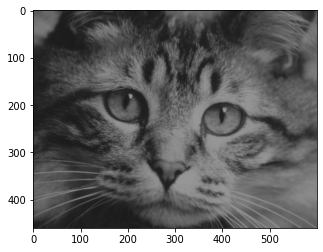

In [1]:
# read and show the given image
import cv2
import matplotlib.pyplot as plt
import math

img = cv2.imread('COMP9517_22T2_Lab1_Images/Kitten.png', 0)
print(img.shape)
plt.imshow(img, cmap='gray', vmin=0, vmax=255 )
plt.show()

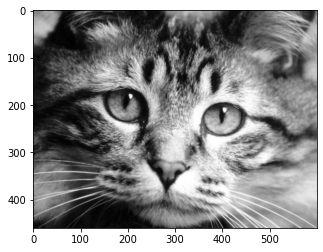

In [2]:
# Question 1
import numpy as np

img1 = (img - np.min(img)) * (255/(np.max(img) - np.min(img)))
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.show()

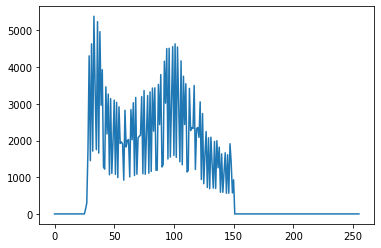

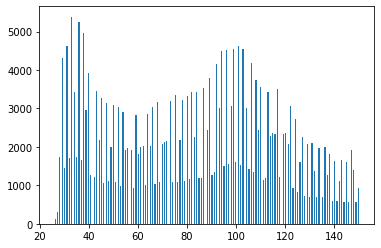

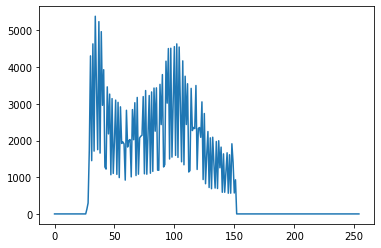

In [3]:
# Question 2

imgHist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.plot(imgHist)
plt.show()

# or implemented by
data = list(img[:,:].flatten())
plt.hist(data, bins=256)
plt.show()

# without using in-built function
from bisect import bisect
breakpoints = list(range(0,255))
def bin_data(val, breakpoints=[60, 70, 80, 90], bins=[4,3,2,1]):
        i = bisect(breakpoints, val)
        return bins[i]

binned = [bin_data(i,breakpoints, breakpoints) for i in data]

hist = np.zeros(len(breakpoints))
for i in binned:
    idx = breakpoints.index(i)
    hist[idx] += 1

plt.plot(breakpoints, hist)
plt.show()

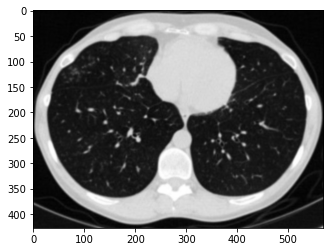

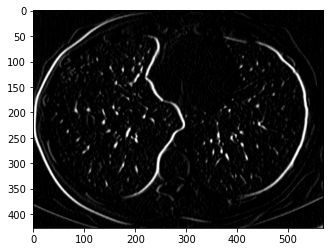

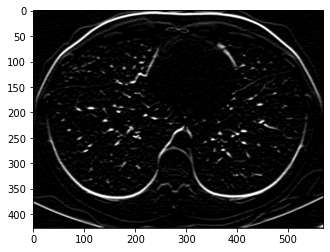

In [4]:
# Question 3

ct_img = cv2.imread('COMP9517_22T2_Lab1_Images/CT.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(ct_img, cmap='gray', vmin=0, vmax=255 )
plt.show()

sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

sbl_x = cv2.filter2D(ct_img, -1, sobel_x)
sbl_y = cv2.filter2D(ct_img, -1, sobel_y)

plt.imshow(sbl_x, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(sbl_y, cmap='gray', vmin=0, vmax=255)
plt.show()

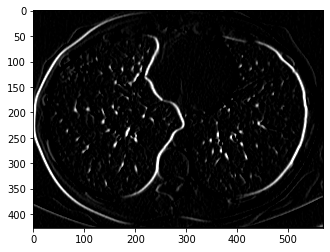

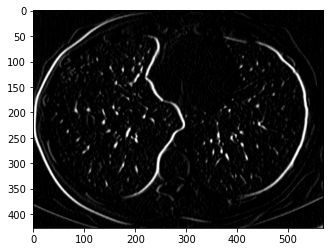

In [5]:
row, col = ct_img.shape

sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

sbl_x = np.zeros((row, col))
for r in range(row - 2):
    for c in range(col - 2):
        gx = (ct_img[r:r+3, c:c+3] * sobel_x).sum()
        sbl_x[r, c] = gx
plt.imshow(sbl_x, cmap='gray', vmin=0, vmax=255)
plt.show()

sbl_xcv = cv2.filter2D(ct_img, -1, sobel_x)
plt.imshow(sbl_xcv, cmap='gray', vmin=0, vmax=255)
plt.show()

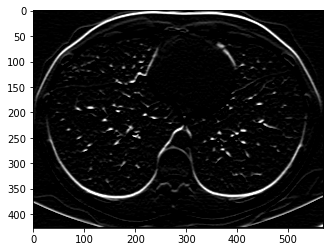

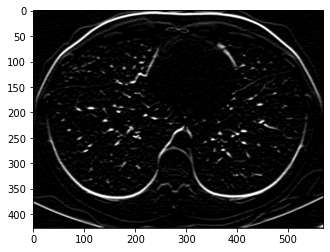

In [6]:
row, col = ct_img.shape

sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

sbl_y = np.zeros((row, col))
for r in range(row - 2):
    for c in range(col - 2):
        gy = (ct_img[r:r+3, c:c+3] * sobel_y).sum()
        sbl_y[r, c] = gy
plt.imshow(sbl_y, cmap='gray', vmin=0, vmax=255)
plt.show()

sbl_ycv = cv2.filter2D(ct_img, -1, sobel_y)
plt.imshow(sbl_ycv, cmap='gray', vmin=0, vmax=255)
plt.show()

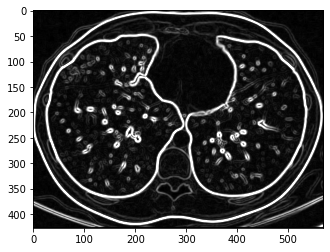

In [7]:
row, col = ct_img.shape
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

new_img = np.zeros((row, col))
for r in range(row - 2):
    for c in range(col - 2):
        gx = (ct_img[r:r+3, c:c+3] * sobel_x).sum()
        gy = (ct_img[r:r+3, c:c+3] * sobel_y).sum()
        new_img[r, c] = (gx * gx + gy * gy) ** 0.5
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.show()

(400, 400)


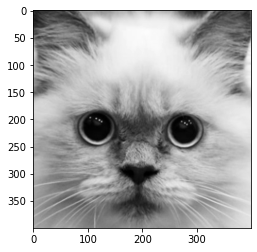

In [8]:
# Question 4

cat_img = cv2.imread('COMP9517_22T2_Lab1_Images/Cat.png', 0)
print(cat_img.shape)
plt.imshow(cat_img, cmap='gray', vmin=0, vmax=255 )
plt.show()

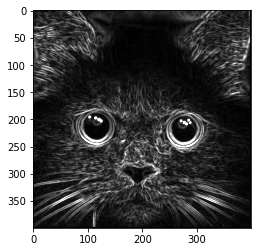

In [9]:
row, col = cat_img.shape
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

cat_filtered = np.zeros((row, col))
for r in range(row - 2):
    for c in range(col - 2):
        gx = (cat_img[r:r+3, c:c+3] * sobel_x).sum()
        gy = (cat_img[r:r+3, c:c+3] * sobel_y).sum()
        cat_filtered[r, c] = (gx * gx + gy * gy) ** 0.5
plt.imshow(cat_filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

(400, 400, 3)


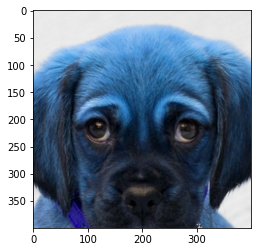

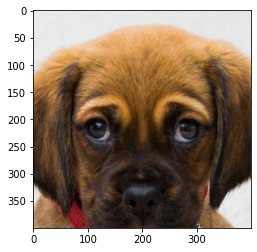

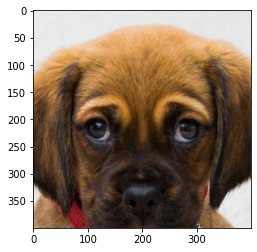

In [10]:
dog_bgr_img = cv2.imread('COMP9517_22T2_Lab1_Images/Dog.png') # rgb
print(dog_bgr_img.shape)
dog_rgb_img = dog_bgr_img[:,:,::-1]
plt.imshow(dog_bgr_img)
plt.show()
plt.imshow(dog_rgb_img)
plt.show()
img_xx = cv2.cvtColor(dog_bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_xx)
plt.show()

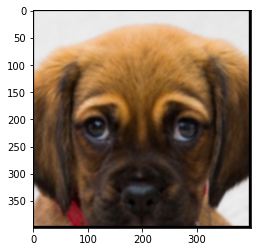

In [11]:
row = dog_rgb_img.shape[0]
col = dog_rgb_img.shape[1]

r_raw, g_raw, b_raw = cv2.split(dog_rgb_img)

kernel = np.ones([5, 5])
r_filter = np.zeros((row, col))
g_filter = np.zeros((row, col))
b_filter = np.zeros((row, col))

# plt.imshow(r_raw, vmin=0, vmax=255)
# plt.show()

for r in range(2, row - 4):
    for c in range(2, col - 4):
        mean = math.ceil((r_raw[r:r+5, c:c+5] * kernel).sum()/25)
        r_filter[r, c] = mean

for r in range(2, row - 4):
    for c in range(2, col - 4):
        mean = math.ceil((g_raw[r:r+5, c:c+5] * kernel).sum()/25)
        g_filter[r, c] = mean
        
for r in range(2, row - 4):
    for c in range(2, col - 4):
        mean = math.ceil((b_raw[r:r+5, c:c+5] * kernel).sum()/25)
        b_filter[r, c] = mean

# dog_rgb_filter = np.dstack((r_filter, g_filter, b_filter)) 

dog_rgb_filter = np.dstack((r_filter, g_filter, b_filter)) .astype(np.uint8)
            

plt.imshow(dog_rgb_filter, vmin=0, vmax=255)
plt.show()


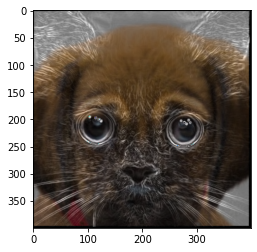

In [19]:
cat_rgb_filter = np.dstack((cat_filtered, cat_filtered, cat_filtered))

img1 = (0.5 * cat_rgb_filter).astype(np.uint8) + (0.5 * dog_rgb_filter).astype(np.uint8)
plt.imshow(img1, vmin=0, vmax=255)
plt.show()

In [ ]:
t = np.array([[0, 0, 75],[0, 75, 80],[0, 75, 80]])
k = np.ones([3,3])
print(math.ceil((t*k).sum()/9))